In [3]:
import csv, matplotlib.pyplot as plt

# Reading the standard from csv

In [4]:
standard = dict()

#Make sure it is in the same folder
with open("syno-gold.csv","r", encoding = "UTF-8") as f:
    for line in f:
        word, similar_word = line.split("\t")
        if word not in standard:
            standard[word] = []
        standard[word].append(similar_word.strip())  
        
        

In [5]:
print("There are",len(standard),"words in the standard.")
standard["abitu"][:5]

There are 38818 words in the standard.


['nõrk', 'kaitsetu', 'hädine', 'hädaline', 'väeti']

# Reading models

In [9]:
#Needs the location of the model .csv as an argument
#Returns the model as a dictionary

def readModel(file):
    model = dict()
    with open(file, "r", encoding = "UTF-8") as f:
        for word,similar_word,score in csv.reader(f,quotechar='"', delimiter=',', quoting=csv.QUOTE_ALL):
            if word not in model:
                model[word] = []
            model[word].append(similar_word) 
    return model

    

In [12]:
sg_model = readModel("W2V_1000d_20epoch_SG_200000topN.csv")
print("The model has",len(sg_model),"words.")
sg_model["abitu"][:5]

The model has 200000 words.


['jõuetu', 'kaitsetu', 'saamatu', 'mittemõistetu', 'pampersilaps']

# Comparison

We are going to compare the model using the following logic
* Pick a word from the standard
* If that word is represented in the model, we check if the most similar word according to the standard is also a similar according to the model
* Do this for all words and keep track of the success rate
* Repeat this for the second most similar word and so on

In [26]:
#Parameters
# model, that we are comparing
# standard, with which we are comparing
# n - how many similar words we are going to search for
# limit - how many similar words we are going to consider in the model
#        for example we may not care if the most similar word is the 50th most similar according to the model
#        default : 100 (so not very limiting)
# returnsPercentage - We can choose whether the function returns a percentage or a tuple

def compare(model,standard, n=1, limit = 100, returnsPercentage = True):
    
    success = 0
    counter = 0
    
    for word in standard:
        
        if word in model:
            i = 0
            while i < n and i<len(standard[word]):
                counter += 1
                if standard[word][i] in model[word][:limit]:
                    success += 1                
                i+= 1
    
    if returnsPercentage:
        return success/counter
    
    return success,counter

In [29]:
#Visualising the model 
#Parameters
# standard, with which we are comparing
# model, that we are comparing
# N - how many different similar words we are going to check
#     default : 10

def visualiseModel(standard, model, N=10):
    comparisons = []
    for n in range(1,N+1):
        p = compare(model, standard, n)
        comparisons.append(p)
        
    plt.bar([i+1 for i in range(N)], height = comparisons, width = .5)
    plt.xticks([i+1 for i in range(N)])
    plt.ylabel("Successful searches / words searched")
    plt.xlabel("Nr of similar words searched per word")
    plt.show()
    

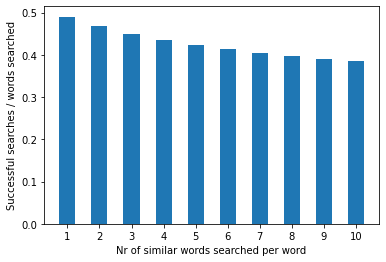

In [30]:
visualiseModel(standard, sg_model)
    

In [31]:
cbow = readModel("W2V_1000d_20epoch_CBOW_200000topN.csv")
sg   = readModel("W2V_1000d_20epoch_SG_200000topN.csv")

In [34]:
def compareModels(model1,model2, standard, N = 10):
    
    comparisons1 = []
    comparisons2 = []
    for n in range(1,N+1):
        p = compare(model1, standard, n)
        comparisons1.append(p)
        p = compare(model2, standard, n)
        comparisons2.append(p)
        
    plt.bar([i+1.1 for i in range(N)], height = comparisons1, width = .2, color = "red")
    
    plt.bar([i+.9 for i in range(N)], height = comparisons2, width = .2, color = "blue")
    
    plt.xticks([i+1 for i in range(N)])
    plt.ylabel("Successful searches / words searched")
    plt.xlabel("Nr of similar words searched per word")
    plt.show()
    


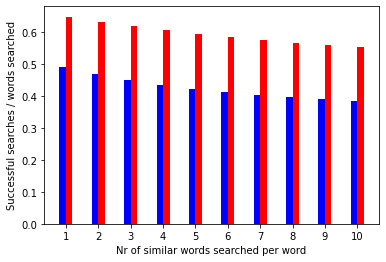

In [35]:
compareModels(cbow,sg,standard)